# Practice Association Rules - Glass Data

**Activity 1:** Read the glass data file from `/dsa/data/all_datasets/glass/glass.txt`. Get the names of glass dataset columns from readme file in `/dsa/data/all_datasets/glass/header.txt` and assign the names to columns of glass_data.

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
## Your code for activity 1 goes here
glass_data = pd.read_csv('/dsa/data/all_datasets/glass/glass.txt')

In [17]:
! cat /dsa/data/all_datasets/glass/header.txt

   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [18]:
glass_data.columns = ["Id","refractive_index","Sodium","Magnesium","Aluminum","Silicon","Potassium","Calcium","Barium","Iron","Type_of_glass"]

In [19]:
glass_data.head()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


The data should be cleaned as it has unnecessary columns and numeric data should be converted to ordered factors.

**Activity 2:**  Remove the attribute **Id** as it is just an identifier. All the other attributes are either numeric or integer. Map the attributes to ordinal attributes by building suitable categories like low, medium, high or very high for the continuous attributes and consulting /datasets/glass/readme.txt for naming guidance for any categorical attributes. 

**Hints:** 
- For continuous variables, consider the distribution of values within the range when assigning your categories. You will get an error if a category has no data in it.
- For categorical attributes, make sure there is at least one data value for each categorical type. You cannot give R a label for a value that doesn't exist. If necessary, use unique() to see what unique values exist for a given column.
- For this dataset, you should not have any NAs when you are done.


In [20]:
glass_data = glass_data.drop(['Id'],axis=1)

In [21]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [1.51,1.517,1.518,1.519,1.534]
labels = ["low", "medium", "high", "very high"]
glass_data['refractive_index'] = pd.cut(glass_data['refractive_index'], 
                                        bins=bins, labels=labels, right=False)

In [22]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [10.72, 12.91, 13.30, 13.82, 17.38]
labels = ["low", "medium", "high", "very high"]
glass_data['Sodium'] = pd.cut(glass_data['Sodium'], bins=bins, labels=labels, right=False)

In [23]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [-1,2.115,3.48,3.6,4.49]
labels = ["low", "medium", "high", "very high"]
glass_data['Magnesium'] = pd.cut(glass_data['Magnesium'], bins=bins, labels=labels, right=False)

In [24]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [0,1.19,1.36,1.63,3.5]
labels = ["low", "medium", "high", "very high"]
glass_data['Aluminum'] = pd.cut(glass_data['Aluminum'], bins=bins, labels=labels, right=False)

In [25]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [69.8,72.28,72.79,73.09,75.41]
labels = ["low", "medium", "high", "very high"]
glass_data['Silicon'] = pd.cut(glass_data['Silicon'], bins=bins, labels=labels, right=False)

In [27]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [-1,0.1225,0.555,0.61,6.21]
labels = ["low", "medium", "high", "very high"]
glass_data['Potassium'] = pd.cut(glass_data['Potassium'],bins=bins,labels=labels,right=False)

In [29]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [5.4,8.24,8.6,9.172,16.190]
labels = ["low", "medium", "high", "very high"]
glass_data['Calcium'] = pd.cut(glass_data['Calcium'],bins=bins,labels=labels,right=False)

In [30]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [-1, 0 , 1.05, 2.1, 3.15]
labels = ["low", "medium", "high", "very high"]
glass_data['Barium'] = pd.cut(glass_data['Barium'], bins=bins, labels=labels, right=False)

In [31]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [-1,0,0.17,0.34,0.51]
labels = ["low", "medium", "high", "very high"]
glass_data['Iron'] = pd.cut(glass_data['Iron'], bins=bins, labels=labels, right=False)

In [32]:
# In this example we will use pd.cut() and bins to create the new column with grouping
bins= [1,2,3,4,5,6,7]
labels = ["building_windows_float_processed", "building_windows_non_float_processed", 
          "vehicle_windows_float_processed","containers","tableware","headlamps"]
glass_data['Type_of_glass'] = pd.cut(glass_data['Type_of_glass'], 
                                     bins=bins, labels=labels, right=False)

In [33]:
glass_data.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,medium,very high,very high,high,medium,medium,low,medium,medium,building_windows_float_processed
1,low,high,high,high,high,medium,low,medium,medium,building_windows_float_processed
2,medium,medium,very high,medium,medium,high,low,medium,medium,building_windows_float_processed
3,medium,medium,very high,medium,high,medium,low,medium,medium,building_windows_float_processed
4,low,low,very high,high,high,very high,low,medium,high,building_windows_float_processed


In [34]:
glass_data.describe()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,213,212,213,212,212,211,212,212,212,184
unique,4,4,4,4,4,4,4,3,3,5
top,low,low,high,high,high,very high,high,medium,medium,building_windows_non_float_processed
freq,74,54,55,55,54,54,54,197,178,76


**Activity 3:** Now, recode the data as a binary incidence matrix by coercing the data set to transactions. Save the transactions to glass_trans variable.

In [35]:
glass_trans = pd.get_dummies(glass_data)
glass_trans.head()

,refractive_index_low,refractive_index_medium,refractive_index_high,refractive_index_very high,Sodium_low,Sodium_medium,Sodium_high,Sodium_very high,Magnesium_low,Magnesium_medium,...,Iron_low,Iron_medium,Iron_high,Iron_very high,Type_of_glass_building_windows_float_processed,Type_of_glass_building_windows_non_float_processed,Type_of_glass_vehicle_windows_float_processed,Type_of_glass_containers,Type_of_glass_tableware,Type_of_glass_headlamps
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


**Activity 4:** Display the first five rules using head function. Use a support of 0.1 and a confidence of 0.6.

In [36]:
# step 1: identify frequent itemsets
frequent_itemsets = apriori(glass_trans,min_support = 0.1,use_colnames=True)
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)

# step 2: infer rules frequent itemsets
print(f"num of rules = {rules.shape[0]}")

num of rules = 742


In [37]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Calcium_low),(refractive_index_low),0.248826,0.347418,0.178404,0.716981,2.063743,0.091957,2.305790
1,(refractive_index_low),(Barium_medium),0.347418,0.924883,0.309859,0.891892,0.964330,-0.011462,0.694836
2,(refractive_index_low),(Iron_medium),0.347418,0.835681,0.295775,0.851351,1.018752,0.005444,1.105420
3,(refractive_index_medium),(Barium_medium),0.234742,0.924883,0.220657,0.940000,1.016345,0.003549,1.251956
4,(refractive_index_medium),(Iron_medium),0.234742,0.835681,0.201878,0.860000,1.029101,0.005709,1.173709


**Activity 5:** Draw a scatter plot for the generated rules using measures 'support' and 'confidence'. Use 'lift' for shading.

In [38]:
support=rules['support']
confidence=rules['confidence']

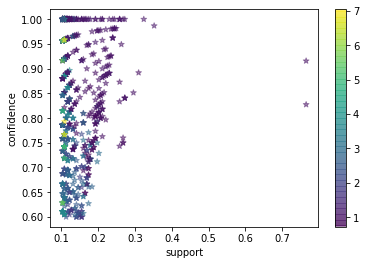

In [39]:
plt.scatter(support,confidence,c=rules['lift'],alpha=0.5,marker="*")
plt.colorbar()
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**Activity 6:** Draw a scatter plot for the generated rules using the measures 'lift' and 'leverage'. 

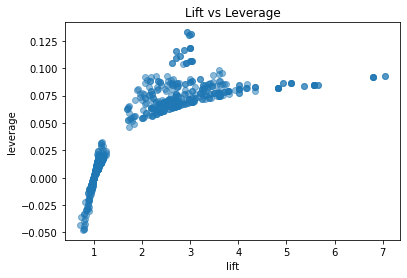

In [41]:
plt.scatter(rules['lift'],rules['leverage'],alpha=0.5)
plt.xlabel('lift')
plt.ylabel('leverage')
plt.title('Lift vs Leverage');
plt.show()

# Save your notebook, then `File > Close and Halt`